# Style Transfer

---

## Setup

In [3]:
!pip install tensorflow_hub tensorflow matplotlib numpy opencv-python

  Using cached tensorflow_hub-0.12.0-py2.py3-none-any.whl (108 kB)


In [4]:
import tensorflow_hub as hub
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [5]:
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

## Preprocess

In [21]:
def load_image(img_path):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = img[tf.newaxis, :]
    return img

In [22]:
content_image = load_image('cat.jpg')
style_image = load_image('monet.jpeg')

## Visualize Output

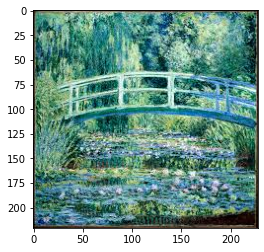

In [23]:
plt.imshow(np.squeeze(style_image))

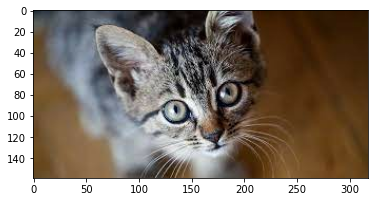

In [24]:
plt.imshow(np.squeeze(content_image))

## Stylize Image

In [25]:
stylized_image = model(tf.constant(content_image), tf.constant(style_image))[0]

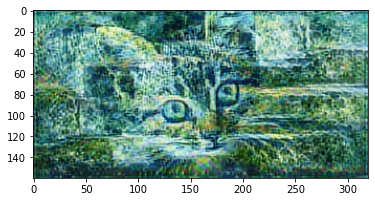

In [26]:
plt.imshow(np.squeeze(stylized_image))

In [27]:
cv2.imwrite('generated_img.jpg', cv2.cvtColor(np.squeeze(stylized_image)*255, cv2.COLOR_BGR2RGB))

True